In [1]:
import datetime as date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
#read csv file of kickstarter projects from the last 5 years
#Load into dataframe
df = pd.read_csv('ks-projects-201801.csv', keep_date_col=True, infer_datetime_format=True, parse_dates=['deadline'])

#Add column percent to goal.  Dollars pledged / Dollars Goal 
df['percent_to_goal'] = df['usd_pledged_real'] / df['usd_goal_real'] * 100

#Add column pledge per backer.  Dollars pledged / Number of Backers
df['pledge_per_backer'] = df['usd_pledged_real'] / df['backers'] 

#Was unable to sort by date of kickstart.  !! This did not work !!
df.sort_values(by=['deadline'])

#Print datatypes of dataframe
print(df.dtypes)

#Peak at dataframe
df.head(10)


ID                            int64
name                         object
category                     object
main_category                object
currency                     object
deadline             datetime64[ns]
goal                        float64
launched                     object
pledged                     float64
state                        object
backers                       int64
country                      object
usd pledged                 float64
usd_pledged_real            float64
usd_goal_real               float64
percent_to_goal             float64
pledge_per_backer           float64
dtype: object


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,percent_to_goal,pledge_per_backer
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0.000000,NaN
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,8.070000,161.400000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0.488889,73.333333
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0.020000,1.000000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,6.579487,91.642857
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,104.750000,233.816964
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,120.500000,75.312500
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,1.812000,11.325000
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,6.586400,141.948276
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,9.600877,145.129535


In [3]:
#Copy dataframe to 3 new dataframes
#ks = kickstarters-successful
#kf = kickstarters-failed
#kzero = Kickstarters earning zero
ks = df
kf = df
kzero = df

#Filter dataframe to include: 
#- Successfull campaigns (reach 100% of goal)
#- Remove outliers (Pleged > 500,000) or (Goal < 300,000)
ks = ks.loc[ks['percent_to_goal'] >= 100]
ks = ks.loc[ks['usd_pledged_real'] < 500000]
ks = ks.loc[ks['usd_goal_real'] < 300000] 


#Filter dataframe to include:
#- Unsuccessfull campaigns (Goal < 100%, Earned more than 0)
#- Remove outliers Goal < 300,000
kf = kf.loc[kf['percent_to_goal'] < 100]
kf = kf.loc[kf['usd_pledged_real'] > 0]
kf = kf.loc[kf['usd_goal_real'] < 300000] 

#Filter dataframe to include:
#- campaigns Earning zero (Pleged = 0)
kzero = kzero.loc[kzero['usd_pledged_real'] == 0]



#ks = ks.loc[ks['usd_pledged_real'] > 0]
#ks = ks.sort_values(by=['percent_to_goal'], ascending="False")
#ks = ks.loc[0:400000] 
#kzero.head(1000)


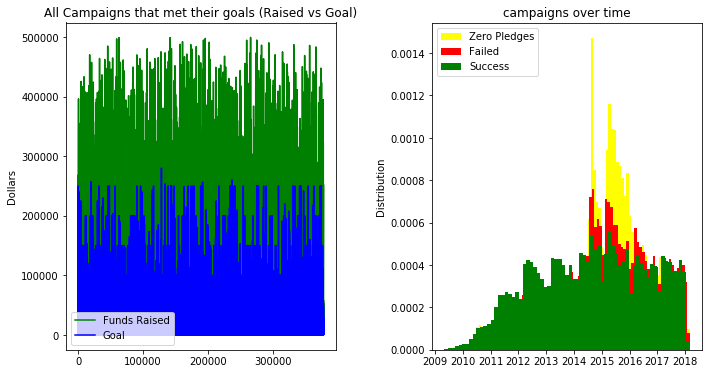

In [10]:

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(ks['usd_pledged_real'], color = "green", label="Funds Raised")
plt.plot(ks['usd_goal_real'], color = "blue", label="Goal")
plt.title('All Campaigns that met their goals (Raised vs Goal)')
plt.legend(loc=3)
plt.ylabel('Dollars')
          
plt.subplot(2,2,2)
plt.hist(kzero['deadline'], bins="auto", color = "yellow", density=True, label="Zero Pledges")
plt.hist(kf['deadline'], bins="auto", color = "red", density=True, label="Failed")
plt.hist(ks['deadline'], bins="auto", color = "green", density=True, label="Success")
plt.title('campaigns over time')
plt.legend(loc=2)
plt.ylabel('Distribution')


plt.tight_layout()
plt.show()


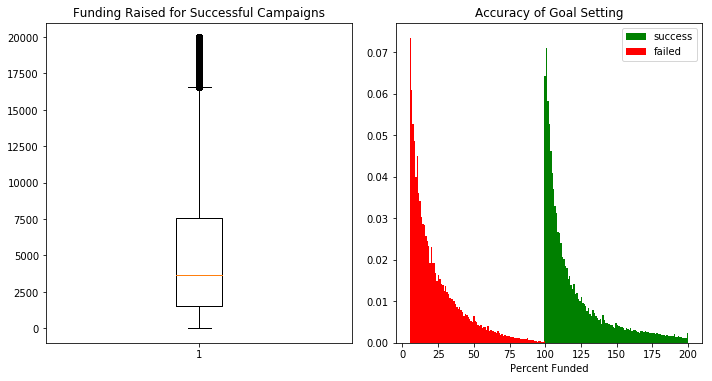

In [74]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title('Funding Raised for Successful Campaigns')
k1 = ks.loc[ks['usd_pledged_real'] < 20000]   #cut off the high end to visualize the boxplot
plt.boxplot(k1['usd_pledged_real'])


plt.subplot(2,2,2)
plt.hist(ks['percent_to_goal'], bins="auto", density=True, range=[25,200], color="green", label="success")
plt.hist(kf['percent_to_goal'], bins="auto", density=True, range=[5,100], color="red", label="failed")
plt.legend(loc=1)
plt.title('Accuracy of Goal Setting')
plt.xlabel('Percent Funded')

#plt.title('Percent Funded for Failed Projects')
#plt.xlabel('Percent Funded')
#plt.boxplot(kf['percent_to_goal'])

plt.tight_layout()
plt.show()

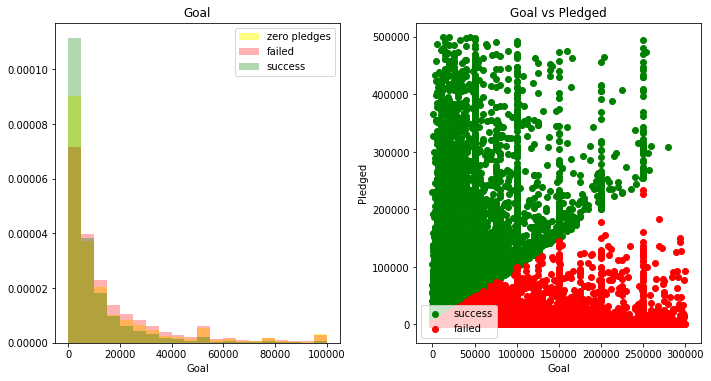

In [68]:
plt.figure(figsize=(10,10))


plt.subplot(2,2,1)
#plt.boxplot(pledged, autorange=True, meanline=True, notch=True)
#plt.hist(ks['usd_pledged_real'], bins="auto", density=True, range=(0,50000), color="green" ) #
#plt.xlabel('Funds Raised')
#plt.title('Funds Raised for Successful Campaigns')

plt.hist(kzero['usd_goal_real'], bins=20, density=True, range=(0,100000), color="yellow", label="zero pledges", alpha=.5 )#
plt.hist(kf['usd_goal_real'], bins=20, density=True, range=(0,100000), color="red", label="failed" , alpha=.3) #
plt.hist(ks['usd_goal_real'], bins=20, density=True, range=(0,100000), color="green", label="success" , alpha=.3) 


plt.xlabel('Goal')
plt.legend(loc=1)
plt.title('Goal')



plt.subplot(2,2,2)
plt.scatter(x=ks['usd_goal_real'], y=ks['usd_pledged_real'], color ="green", label="success")
plt.scatter(x=kf['usd_goal_real'], y=kf['usd_pledged_real'], color ="red", label="failed")
plt.title('Goal vs Pledged')
plt.legend(loc=3)
plt.xlabel('Goal')
plt.ylabel('Pledged')

plt.tight_layout()
plt.show()

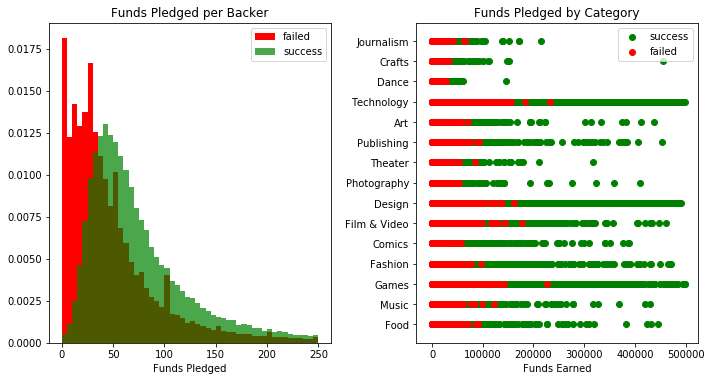

In [7]:
plt.figure(figsize=(10,10))


plt.subplot(2,2,1)
#plt.boxplot(pledge_per_backer, autorange=True, meanline=True)
plt.hist(kf['pledge_per_backer'], bins=50, range=(0,250), density=True, color="red", alpha=1, label="failed")
plt.hist(ks['pledge_per_backer'], bins=50, range=(0,250), density=True, color="green", alpha=.7, label="success")
plt.title('Funds Pledged per Backer')
plt.xlabel('Funds Pledged')
plt.legend(loc=1)

plt.subplot(2,2,2)
plt.scatter(x=ks['usd_pledged_real'], y=ks['main_category'], color ="green", label="success")
plt.scatter(x=kf['usd_pledged_real'], y=kf['main_category'], color ="red", label="failed")
plt.title('Funds Pledged by Category')
plt.xlabel('Funds Earned')
plt.legend(loc=1)

plt.tight_layout()
plt.show()